# Contents:
This notebook has two sections.
- Distribution Functions
- Specific Heat
References

To learn more about each of the functions and libraries used, use the links in the [References](#references) section.

### Distribution Funtions
The codes to implement and fit the three distribution functions in statistical physics.
- [Maxwell-Boltzmann](#maxwell)
- [Fermi-Dirac](#fermi)
- [Bose-Einstein](#bose)

In [8]:
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

<a id = 'maxwell'></a>

### Maxwell-Boltzmann distribution function

Add details, formula

use the stats library to call the maxwell function

this generates a Maxwell continuous random variable

In [2]:
maxwell = stats.maxwell

Generate random numbers (which will be our dataset)

Use the parameter 'size' to set the number of data points. Here, we generate 10,000 dat points

In [10]:
data = maxwell.rvs(size=10000)

In [11]:
# check that the data contains 10,000 points

len(data)

10000

(array([ 332., 1255., 2201., 2327., 1871., 1135.,  547.,  225.,   89.,
          18.]),
 array([0.09725987, 0.50495471, 0.91264956, 1.3203444 , 1.72803925,
        2.1357341 , 2.54342894, 2.95112379, 3.35881863, 3.76651348,
        4.17420832]),
 <BarContainer object of 10 artists>)

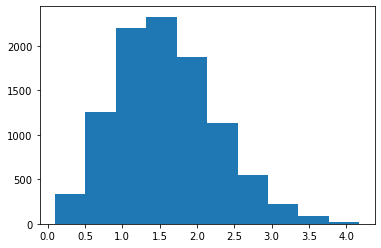

In [12]:
# make a histogram of the data, to check how it looks

plt.hist(data)

Now, use the maxwell function to fit the data. It provides estimates for generic data.

Use the option 'floc=0' when you fit the data. Without that, the fit method treats the location as one more free parameter to be included in the fit (which is not what we want).

In [16]:
params = maxwell.fit(data, floc=0)

# print the parameters for the fitted result

print(params)

(0, 0.9933598342012706)


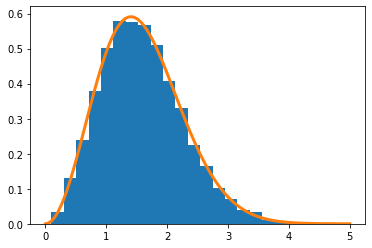

In [21]:
plt.hist(data, bins=20, density = True)
x = np.linspace(0, 5, 100)
plt.plot(x, maxwell.pdf(x, *params), lw=3)
plt.show()

<a id = 'fermi'></a>

### Fermi-Dirac distribution function

Add details, formula

In [10]:
eigenvalue = [0.9, 1.3]
fermi = 1.0
T = 300
kB = 8.61733e-5


def fermi_integral(E, fermi, T):
    if E < fermi:
        return 1 / (1 + np.exp((E - fermi) / (kB * T)))
    else:
        return np.exp(-(E - fermi) / (kB * T)) / (1 + np.exp(-(E - fermi) / (kB * T)))


for i in range(len(eigenvalue)):
    result = integrate.quad(fermi_integral, eigenvalue[i], np.inf,
                            args=(fermi, T))
    print(result)

(0.10053464900138948, 1.226019498925419e-09)
(2.3589139312840432e-07, 4.1489077966670465e-11)


<a id = 'bose'></a>

### Bose-Einstein distribution function

Add details and formula

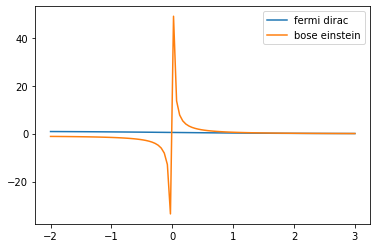

In [6]:
def fermi_dirac(x):

    fermi_result = (1./(np.exp(x)+1))

    return fermi_result

def bose_einstein(x):

    bose_result = (1/(np.exp(x)-1))

    return bose_result

x = np.linspace( -2,3, 100)
fd = fermi_dirac(x)
be = bose_einstein(x)

plt.figure()
plt.plot(x, fd, label='fermi dirac')
plt.plot(x, be, label ='bose einstein')
plt.legend(loc='best')
plt.show()

Plot the following functions with energy at different temperatures:

a) Maxwell-Boltzmann distribution

b)Fermi-Dirac distribution 

c) Bose-Einstein distribution 

In [4]:
E = np.linspace(-0.5, 0.5, 1001)    #energy range  
e = 1.6e-19    #electric charge  
k = 1.38e-23    #Boltzmann constant(joule per kelvin)  
u = 0     #considering chemeical potential of the substance is zero 

In [5]:
 def func(T, a):  
    """ This is the general equation,  
    for Maxwell-Boltxmann distribution a=0,  
    for Bose-Einstein a=-1  
    and for Fermi-Dirac a=+1 """ 
    
    return 1/((np.exp(((E-u)*e)/(k*T)))+a)

<ipython-input-5-a82051d18e4f>:7: RuntimeWarning: divide by zero encountered in true_divide
  return 1/((np.exp(((E-u)*e)/(k*T)))+a)
<ipython-input-5-a82051d18e4f>:7: RuntimeWarning: divide by zero encountered in true_divide
  return 1/((np.exp(((E-u)*e)/(k*T)))+a)
<ipython-input-5-a82051d18e4f>:7: RuntimeWarning: divide by zero encountered in true_divide
  return 1/((np.exp(((E-u)*e)/(k*T)))+a)
<ipython-input-5-a82051d18e4f>:7: RuntimeWarning: divide by zero encountered in true_divide
  return 1/((np.exp(((E-u)*e)/(k*T)))+a)
<ipython-input-5-a82051d18e4f>:7: RuntimeWarning: divide by zero encountered in true_divide
  return 1/((np.exp(((E-u)*e)/(k*T)))+a)


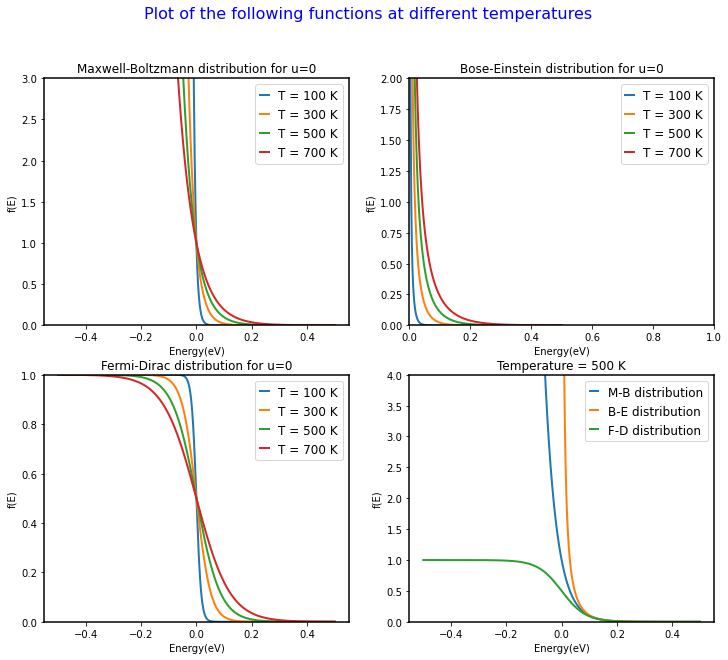

In [7]:
newparams = {
     'axes.labelsize': 10, 'axes.linewidth': 1.5, 'savefig.dpi': 300,   
    'lines.linewidth': 2, 'figure.figsize': (12, 10),    
    'legend.frameon': True,   
    'legend.handlelength': 0.7}   

plt.rcParams.update(newparams)  
 
plt.suptitle('Plot of the following functions at different temperatures', 
             size = 16,color='b')  
plt.subplot(2,2,1)  
plt.plot(E, func(100,0),label='T = 100 K')  
plt.plot(E, func(300,0),label='T = 300 K')  
plt.plot(E, func(500,0),label='T = 500 K')  
plt.plot(E, func(700,0),label='T = 700 K')  
plt.ylim(0,3)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.legend(loc='best',prop={'size':12})  
plt.title('Maxwell-Boltzmann distribution for u=0')  


plt.subplot(2,2,2)  
plt.plot(E, func(100,-1),label='T = 100 K')  
plt.plot(E, func(300,-1),label='T = 300 K')  
plt.plot(E, func(500,-1),label='T = 500 K')  
plt.plot(E, func(700,-1),label='T = 700 K')  
plt.xlim(0,1)  
plt.ylim(0,2)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.legend(loc='best',prop={'size':12})        
plt.title('Bose-Einstein distribution for u=0')  


plt.subplot(2,2,3)  
plt.plot(E, func(100,+1),label='T = 100 K')  
plt.plot(E, func(300,+1),label='T = 300 K')  
plt.plot(E, func(500,+1),label='T = 500 K')  
plt.plot(E, func(700,+1),label='T = 700 K')  
plt.legend(loc='best',prop={'size':12})  
plt.ylim(0,1)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.title('Fermi-Dirac distribution for u=0') 


plt.subplot(2,2,4)  
plt.plot(E, func(500,0),label='M-B distribution')  
plt.plot(E, func(500,-1),label='B-E distribution')  
plt.plot(E, func(500,+1),label='F-D distribution')  
plt.legend(loc='best',prop={'size':12})  
plt.ylim(0,4)  
plt.xlabel('Energy(eV)')  
plt.ylabel('f(E)')  
plt.title('Temperature = 500 K')  

plt.show()     

## Specific Heat
- Plot Dulong-Petit law
- Einstein distribution function
- Debye distribution function for high temperature and low temperature and compare them for the two cases.

<a id = 'references'></a>

## References:
1. [python scipy maxwell function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.maxwell.html#scipy.stats.maxwell)